# Avaliação 1

Essa avaliação consiste em uma analise do data set: “Iris Flower Data Set”

Alunos: Guilherme Prazeres Matos de Souza e Joaquim joca da Silva

## Questão 1

In [1]:
# Blibliotecas necessarias e dependencias

import matplotlib.pyplot as plt
import pandas as pd

# Load CSV file into a pandas DataFrame
iris = pd.read_csv('iris.csv')

### a.

O data set apresenta atributos **Multivariados** <br>
onde tem **4 Atributos preditivos e  1 Atributo Alvo**

### b.

A classe é simbólica com escala **nominal**, pois ela representa com um nome a flor, já os outros 4 atributos, são numéricos, com escala **racional**, já que se tratam de medidas de dimensão, avaliados em centimetro como unidade.

### c.

Os dados ja estão balanceados como mostrado no grafico:

In [ ]:
# Plot do grafico e contagem
type_counts = db['species'].value_counts()

# Plotting
type_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Quantidade de cada especie')
plt.xlabel('Tipo')
plt.ylabel('Amostras')
plt.xticks(rotation=0)

# Adicionando grid e ajustando o layout
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Realizando os calculos podemos ver as estatiscas pertinentes sobre a data base <br>
Podemos ver a média de cada especie de flor

In [ ]:
# Calculo da media

species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = iris.index.map(lambda x: species_names[x // 50])

# Calculando a média de cada atributo por tipo de flor
mean_by_species = iris.groupby('species').mean()

# # Definindo uma paleta de cores em tons de azul escuro
# colors = ['#1f77b4', '#2ca02c', '#17becf']

# # Plotando a média de cada atributo por tipo de flor com as cores definidas
# mean_by_species.plot(kind='bar', figsize=(10, 6), color=colors)
# plt.title('Média de Atributos por Tipo de Flor')
# plt.xlabel('Tipo de Flor')
# plt.ylabel('Média')
# plt.xticks(rotation=0)
# plt.show()


print(mean_by_species)


Calculando o Desvio padrão dos dados

In [ ]:
# Calculo do desvio padrão
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = iris.index.map(lambda x: species_names[x // 50])

# Calculando o desvio padrão de cada atributo por tipo de flor
std_by_species = iris.groupby('species').std()

# # Definindo uma paleta de cores
# colors = ['#0C73AD', '#0C3FAD', '#22AE31','#1E5824']

# # Plotando o desvio padrão de cada atributo por tipo de flor com as cores definidas
# std_by_species.plot(kind='bar', figsize=(10, 6), color=colors)
# plt.title('Desvio Padrão de Atributos por Tipo de Flor')
# plt.xlabel('Tipo de Flor')
# plt.ylabel('Desvio Padrão')
# plt.xticks(rotation=0)

# # Adicionando grid e ajustando o layout
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()

# # plt.show()

print(std_by_species)


Calculando a mediana para cada atributo preditivo

In [ ]:
# Calculo a mediana
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = iris.index.map(lambda x: species_names[x // 50])

# Calculando a mediana de cada atributo por tipo de flor
median_by_species = iris.groupby('species').median()

# # Definindo uma paleta de cores em tons de azul escuro
# colors = ['#0C73AD', '#0C3FAD', '#22AE31','#1E5824']

# # Plotando a mediana de cada atributo por tipo de flor com as cores definidas
# median_by_species.plot(kind='bar', figsize=(10, 6), color=colors)
# plt.title('Mediana de Atributos por Tipo de Flor')
# plt.xlabel('Tipo de Flor')
# plt.ylabel('Mediana')
# plt.xticks(rotation=0)

# # Adicionando grid e ajustando o layout
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# # plt.show()

print(median_by_species)



Calculando a obliquidade dos dados

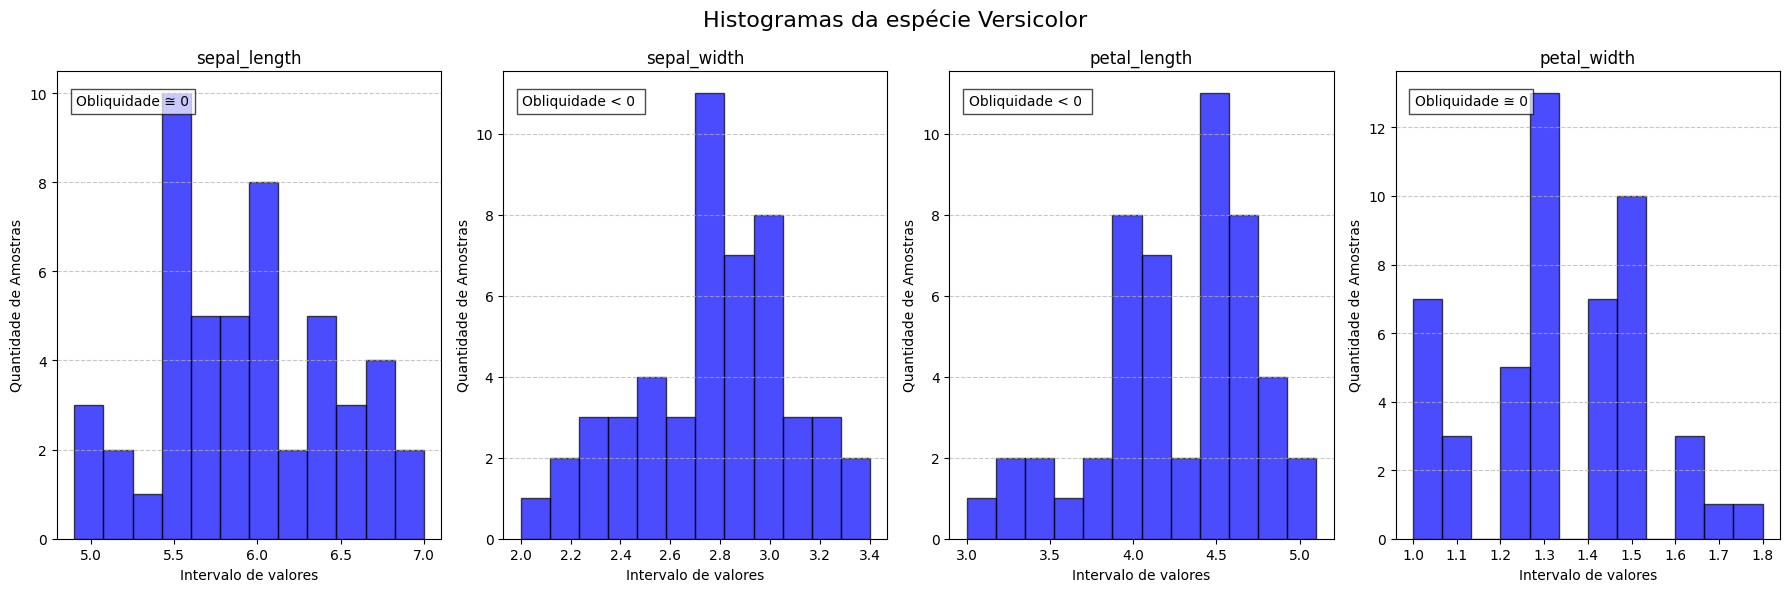

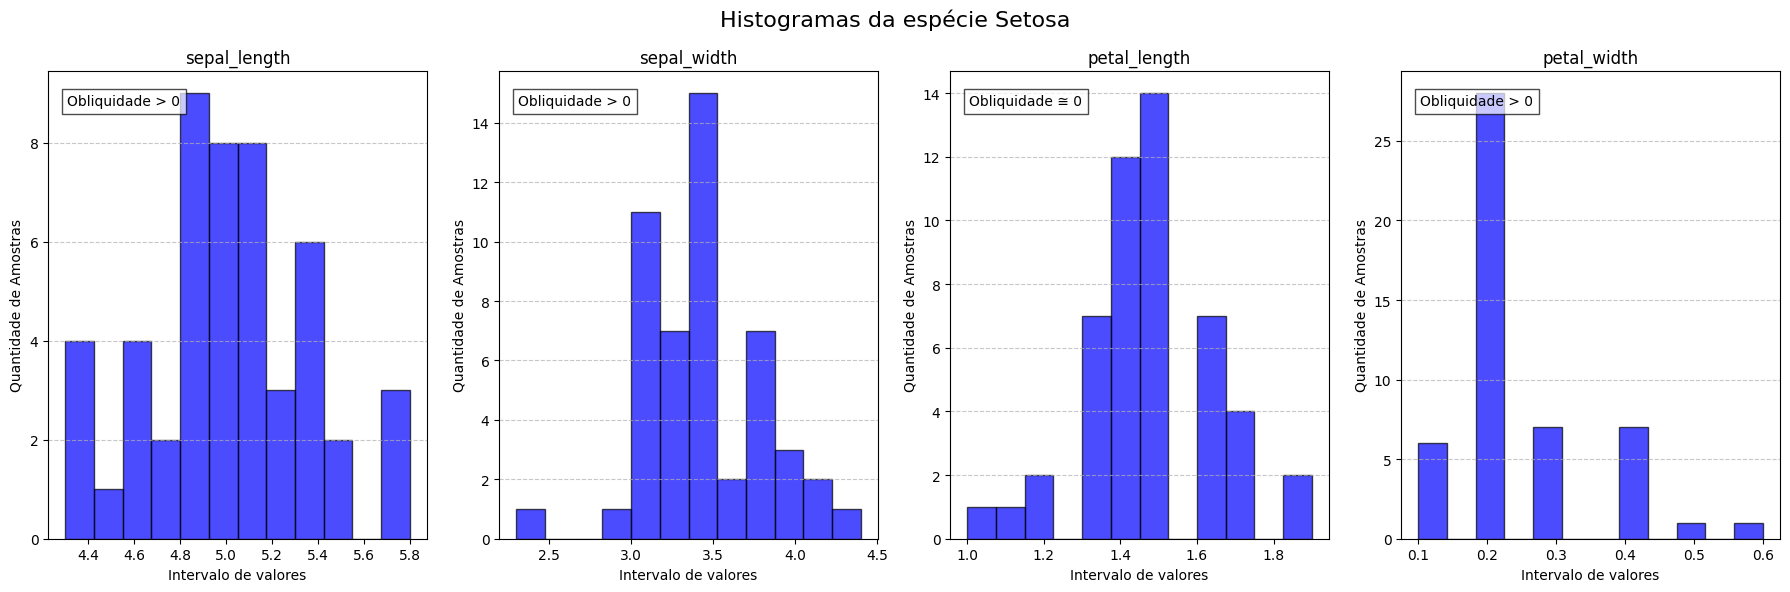

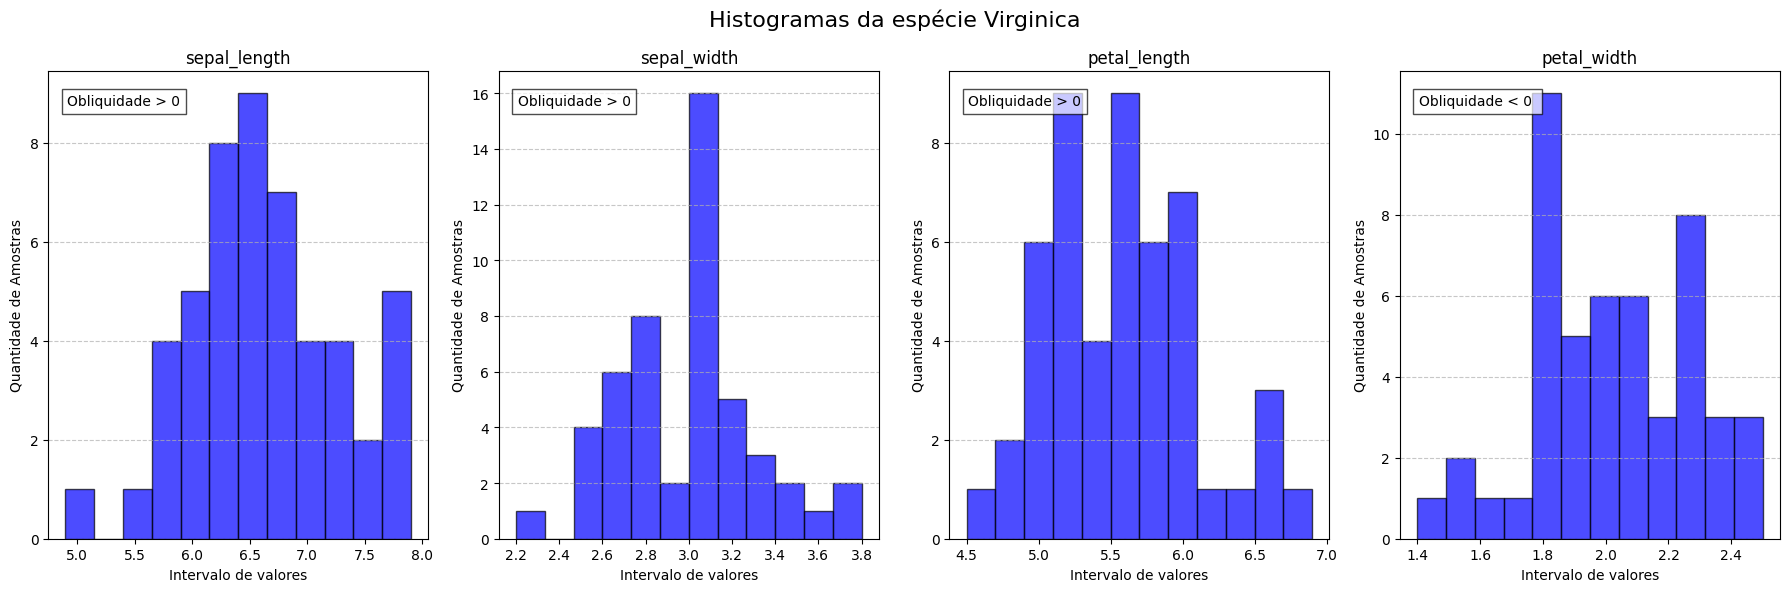

In [21]:
Versicolor = iris[iris['species'] == 'versicolor']
Setosa = iris[iris['species'] == 'setosa']
Virginica = iris[iris['species'] == 'virginica']

def skewness(db, species_name):
    # Definindo as colunas numéricas para plotar o histograma
    numeric_columns = [col for col in db.columns if db[col].dtype != 'object']
    
    fig, axs = plt.subplots(1, len(numeric_columns), figsize=(18, 6))
    
    # Plotando gráfico de colunas para cada coluna numérica
    for idx, column in enumerate(numeric_columns):
        
        # Definindo o número de bins e os limites do histograma
        num_bins = 12
        min_value = db[column].min()
        max_value = db[column].max()
        bin_width = (max_value - min_value) / num_bins
        
        # Calculando os limites dos bins
        bins = [min_value + i * bin_width for i in range(num_bins+1)]
        
        # Calculando a obliquidade
        skewness_cal = (((db[column] - db[column].mean()) / db[column].std()).pow(3).mean()) * 10
        aproxx_skew = int(skewness_cal)
        if aproxx_skew != 0:
            if skewness_cal > 0: 
                skewness = 'Obliquidade > 0'
            elif skewness_cal < 0:
                skewness = 'Obliquidade < 0 '
        else:
            skewness = 'Obliquidade ≅ 0'
        
        # Plotando o histograma
        axs[idx].hist(db[column], bins=bins, color='blue', alpha=0.7, edgecolor='black', density=False)
        
        # Configurando o título e os rótulos dos eixos
        axs[idx].set_title(f'{column}')
        axs[idx].set_xlabel('Intervalo de valores')
        axs[idx].set_ylabel('Quantidade de Amostras')
        axs[idx].grid(True, axis='y', linestyle='--', alpha=0.7)
        
        axs[idx].text(0.05, 0.95, skewness, transform=axs[idx].transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
        
    plt.suptitle(f'Histogramas da espécie {species_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plotando para cada espécie
skewness(Versicolor, 'Versicolor')
skewness(Setosa, 'Setosa')
skewness(Virginica, 'Virginica')


### f.

In [ ]:
# Mapeando o índice das linhas para o nome da espécie
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = iris.index.map(lambda x: species_names[x // 50])

# Definindo uma paleta de cores
colors = ['#0C73AD', '#0C3FAD', '#22AE31','#1E5824']

# Lista de atributos
attributes = iris.columns[:-1]

# Criando um único boxplot para cada espécie
for species, color in zip(species_names.values(), colors):
    subset = iris[iris['species'] == species][attributes]
    
    # Configurando o boxplot
    subset.boxplot(rot=0, grid=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor=color))
    
    plt.title(f'Boxplot dos Atributos para {species}')
    plt.xlabel('Atributos')
    plt.ylabel('Valores')
    
    # Mostrando o boxplot
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

